<a href="https://colab.research.google.com/github/Moraw1993/Programowanie-SI/blob/main/Colab/1_Poczatki_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wstęp

W pierwszym momencie pobieramy dane

In [6]:
from pathlib import Path
import urllib.request
import tarfile
import pandas as pd

def load_house_data():
    tarball_path = Path('datasets/housing.tgz') #ścieżka do umieszczenia pliku
    if not tarball_path.is_file(): # sprawdzamy czy plik istnieje
      Path("datasets").mkdir(parents=True, exist_ok=True)
      url = "https://github.com/ageron/data/raw/main/housing.tgz"
      urllib.request.urlretrieve(url, tarball_path) # pobieramy plik do konkretnej ścieżki
      with tarfile.open(tarball_path) as housing_tarball: # otwieramy plik tgz
        housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_house_data()

Po wczytaniu danych można zobaczyć jakie dane się tam ukrywają.

Wykorzystam do tego bibliotekę pandas i funkcję:

.head()

In [7]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Opis atrybutów

Każdy wiersz przedstawia dane dla osobnego dystruktu (najmniejszej jednostki bloków), każdy dystrykt to przedział między 600-3000

- **longtitude** - długość geograficzna
- **latitude** - szerokość geograficzna
- **housing_median_age** - średni wiek mieszkańca
- **total_rooms** - sumaryczna liczba pokoi
- **total_bedrooms** - sumaryczna liczba łazienek
- **population** - populacja
- **households** - liczba rodzin
- **median_income** - mediana przychodów
- **median_house_value** - mediana wartości mieszkania
- **ocean_proximity** - odległość od oceanu

## Rzut okiem na dana

Zaczne od sprawdzenia podstawowych informacji przy użyciu funkcji:
- .info()
- .describe()


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Widzimy, że:
mamy 20_640 wierszy,

8 kolumn float i 1 typu kategorycznego (tekst/object)

w kolumnie 4 total_bedrooms mamy brakujace dane 20_433/20_640 = 207 dystryktów

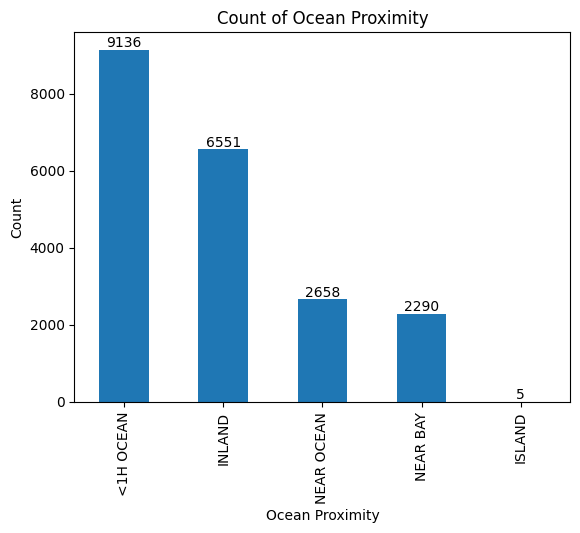

In [45]:
ax = housing['ocean_proximity'].value_counts().plot.bar()

# Dodaj wartości nad słupkami:
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Dodaj etykiety osi x i y oraz tytuł wykresu:
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Count of Ocean Proximity')

# Wyświetl wykres:
plt.show()

In [46]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


aby przyjrzeć się lepiej danym mogę jeszcze użyć histogramów.

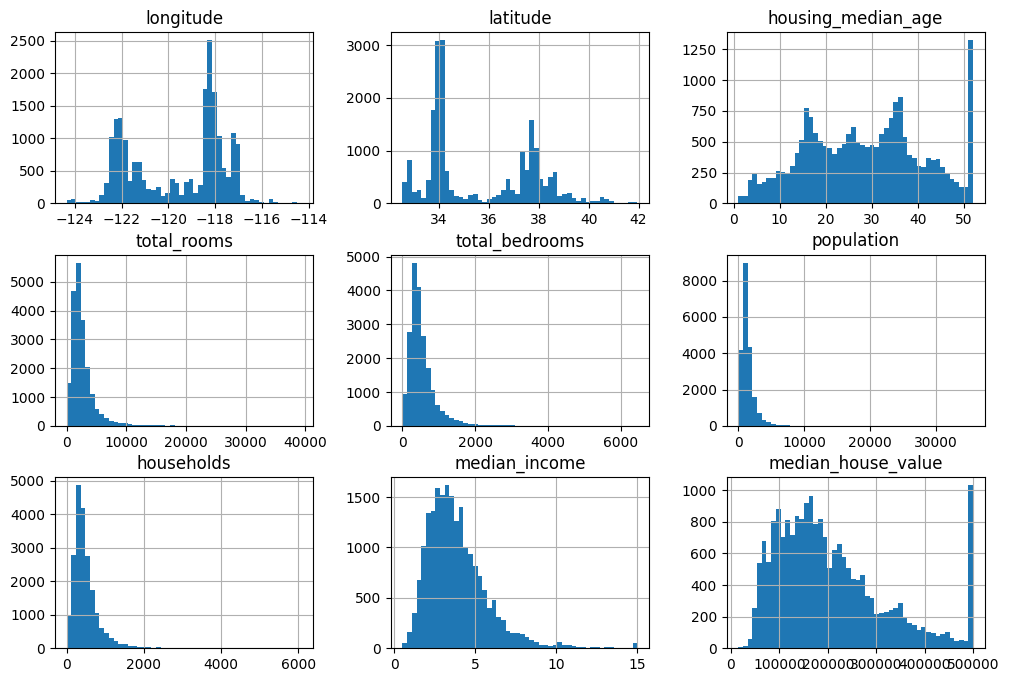

In [47]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,8))
plt.show()

Zauważasz, że **median_income**, nie zgadza się z rzeczywistymi wartościami (USD), po konsulacji dowiadujesz, się że została ona przeskalowana do minimalnej wartości **0.49999** oraz maksymalnej **50.00001**.

Czyli wszystkie wartości < 0.5 zostały wrzucone do 0.49999, natomiast te > 50 wrzucono do 50.0001.

Dodatkowo dowiedziałeś się, ze skala jest oznacza 10_000 tyś.

Ograniczeniu uległy też kolumny housing_median_age oraz median_house_value

# Odkładanie danych treningowych

Ważne, aby szybko odłożyć dane treningowe na bok, aby ich nie podglądać, ponieważ nasz mózg ma zdolności do wykrywania wzorców co może wpłynąć na nasze decyzje

In [59]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  np.random.seed(42)
  shuffle_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffle_indices[:test_set_size]
  train_indices = shuffle_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [60]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(f"train set: {len(train_set)}")
print(f"test set: {len(test_set)}")

train set: 16512
test set: 4128


**Uwaga**

Powyższy podział danych ma jeden duży mankament!. Przy dostarczeniu nowych paczek danych nie mamy pewności czy dane uczące nie trafią do danych testowych.

W tym celu można użyć hashowania wartości indetyfikatora w celu zapewnienia niezmienności zbioru.


In [62]:
from zlib import crc32 #funckja crc32 wylicza 32bitowy ciąg znakow

def is_id_in_test_set(identifier, test_ratio):
  '''
    Sprawdź czy podany id znajduje się w zbiorze testowym
  '''
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [66]:
# nasz zbior nie zawiera kolumny id, wiec wykorzystajmy index

housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

Jeżeli używam index'a wiersza muszę upewnić się, że pozostanie on w pozycji niezmiennej, a nowe wiersze będą dochodziły na końcu. Dodatkowo, zadne inne wiersze nie mogą zostać usunięte.

Jeżeli nie jestem w stanie tego zapewnić mogę stworzyć identyfikator z najmniej zmiennych kolumn. W wypadku tego zbioru mogłyby być to kolumn longitute i latitude

In [69]:
housing_with_id['id'] = housing['longitude'] *1000 + housing['latitude']
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

Istnieją też biblioteki zawierające już gotowe funkcję do podziału danych takie jak sklearn i funkcja train_test_split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)